In [1]:
import tensorflow as tf
import pydot
import numpy as np

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
dataset = tf.data.Dataset.list_files("C:\Users\alexd\CEFE\Images\crops\*\*.tiff")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-5-165800355279>, line 1)

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17758697573259825609]

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [19]:
print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


Avec une loss L1 et une couche de regularisation

In [20]:

sparse_l1_encoder = keras.models.Sequential([
keras.layers.Flatten(input_shape=x_train.shape[1:]),
keras.layers.Dense(100, activation="selu"),
keras.layers.Dense(300, activation="sigmoid"),
keras.layers.ActivityRegularization(l1=1e-3)
])
sparse_l1_decoder = keras.models.Sequential([
keras.layers.Dense(100, activation="selu", input_shape=[300]),
keras.layers.Dense(28 * 28, activation="sigmoid"),
keras.layers.Reshape(x_train.shape[1:])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

#keras.utils.plot_model(sparse_l1_ae)

NameError: name 'keras' is not defined

In [9]:
kl = tf.keras.losses.KLDivergence()


In [10]:
sparse_l1_ae.compile(
    optimizer="rmsprop",
    loss=kl,
    metrics=["mean_absolute_error"],
)

In [13]:
history = sparse_l1_ae.fit(x_train, x_train, batch_size=25, epochs=20, workers=4, use_multiprocessing=True)

Epoch 1/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0208 - mean_absolute_error: 33.9357
Epoch 2/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9358
Epoch 3/20
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9359
Epoch 4/20
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9359
Epoch 5/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9359
Epoch 6/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9360
Epoch 7/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9359
Epoch 8/20
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0200 - mean_absolute_error: 33.9359
Epoch 9/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0200 - mea

In [15]:
sparse_l1_ae.evaluate(
    x=x_test,
    y=x_test,
    batch_size=None,
    verbose=1,
    max_queue_size=10,
    workers=4,
    use_multiprocessing=True
)

313/313 [==============================] - 0s 1ms/step - loss: 0.0200 - mean_absolute_error: 34.4057


[0.019963575527071953, 34.405704498291016]

In [17]:
sparse_l1_ae.metrics_names

['loss', 'mean_absolute_error']

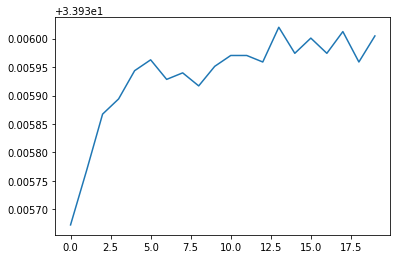

In [20]:
import matplotlib.pyplot as plt

#plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])

In [31]:
img = sparse_l1_ae(x_test[np.newaxis, 1])

NameError: name 'np' is not defined

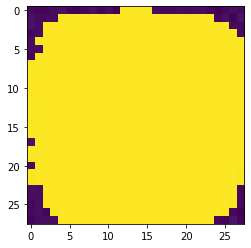

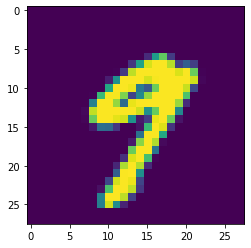

In [29]:
i=20
plt.imshow(img[i])
plt.show()
plt.imshow(x_test[i])
plt.show()

Avec une regularisation basée sur la KL divergence